In [48]:
import numpy as np
import matplotlib.pyplot as plt 
from astropy.io import fits
from astropy.io import ascii
from match import match

plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 4
plt.rcParams['hatch.linewidth'] = 2.0



inf = ascii.read('/Users/connor_auge/Research/Disertation/GOALS/GOALS_cat/GOALS_full_table.csv')
inf2 = ascii.read('/Users/connor_auge/Research/Disertation/GOALS/GOALS_cat/GOALS_xray_sample.csv')
inf3 = ascii.read('/Users/connor_auge/Research/Disertation/GOALS/GOALS_cat/GOALS_xray_cat.csv')

In [62]:
ID1 = np.asarray(inf['IRAS Name'])
LIR = np.asarray(inf['LIR'])

ID2 = np.asarray(inf2['IRAS name'])
LIR2 = np.asarray(inf2['LIR'])

ID3 = np.asarray(inf3['IRAS name'])
L2_10_int = np.asarray(inf3['L2−10_int'],dtype=float)
L2_10_obs = np.asarray(inf3['L2−10_obs'],dtype=float)
# L2_10_int = [inf3['L2-10_int'][i] for i in range(len(inf3['L2-10_int'])) if ]

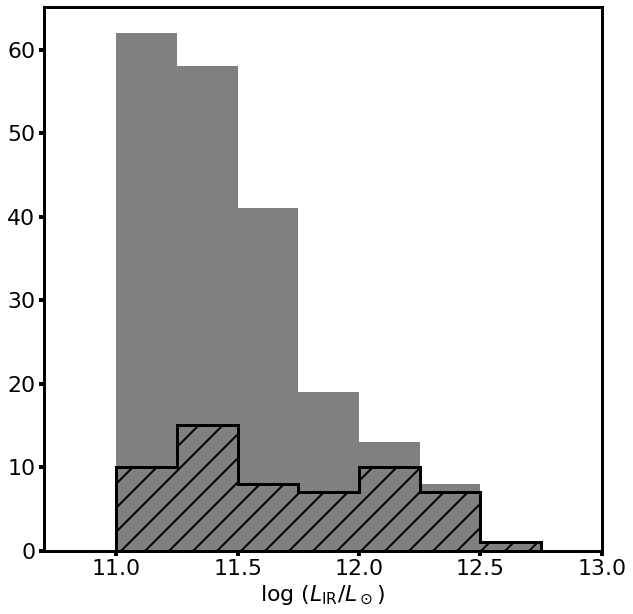

In [120]:
plt.figure(figsize=(10,10))
plt.hist(LIR,np.arange(10,14,0.25),color='gray')
plt.hist(LIR2,np.arange(11,14,0.25),histtype='step',hatch='/',lw=3,color='k')
plt.xlabel(r'log ($L_{\rm IR}$/$L_\odot$)')
plt.xlim(10.7,13)
plt.savefig('/Users/connor_auge/Research/Disertation/GOALS/GOALS_figs/_paper/Lir_hist.pdf')
plt.show()

In [64]:
ID3

array(['F00085−1223', 'F00163−1039', '0', 'F00344−3349', 'F00506+7248',
       'F01053−1746', 'F02069−1022', '0', 'F02401−0013', 'F03117+4151',
       'F03164+4119', 'F03316−3618', 'F04454−4838', 'F05054+1718', '0',
       'F05189−2524', 'F06076−2139', '0', '07251−0248', 'F08354+2555',
       'F08520−6850', 'F08572+3915', 'IRAS\u2009F09111−1007',
       'IRAS\u2009F09111−1007', 'F09320+6134', 'F09333+4841', '0',
       'F10015−0614', '0', 'F10038−3338', 'F10257−4339', 'F10565+2448',
       'F11257+5850', '0', 'F12043−3140', '0', 'F12112+0305',
       'F12243−0036', 'F12540+5708', 'F12590+2934', '0', '13120−5453',
       'F13126+2453', 'F13188+0036', 'F13197−1627', '0', 'F13229−2934',
       'F13362+4831', '0', 'F13428+5608', 'F14348−1447', '0',
       'F14378−3651', 'F14544−4255', '0', 'F15250+3608', 'F15327+2340',
       'F16504+0228', '0', 'F16577+5900', '0', 'F17138−1017',
       'F17207−0014', 'F18293−3413', 'F19297−0406', 'F20221−2458',
       '20264+2533', '0', 'F20550+1655', '0'

In [115]:
LIR2 = LIR2[ID2 != '0']
ID2 = ID2[ID2 != '0']

L2_10_int = L2_10_int[ID3 != '0']
L2_10_obs = L2_10_obs[ID3 != '0']
ID3 = ID3[ID3 != '0']

ix, iy = match (ID2, ID3)

ID2_match = ID2[ix]
LIR2_match = LIR2[ix]

ID3_match = ID3[iy]
L2_10_int_match = L2_10_int[iy]
L2_10_obs_match = L2_10_obs[iy]



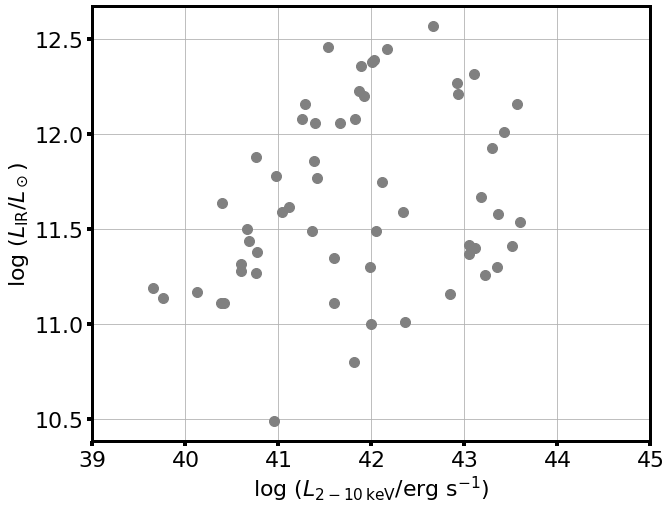

In [96]:
plt.figure(figsize=(10,8))
plt.plot(L2_10_int_match,LIR2_match,'o',ms=10,color='gray')
plt.xlabel(r'log $(L_{2-10\,\rm keV}$/erg s$^{-1}$)')
plt.ylabel(r'log $(L_{\rm IR}$/$L_\odot$)')
plt.xlim(39,45)
plt.grid()
plt.show()


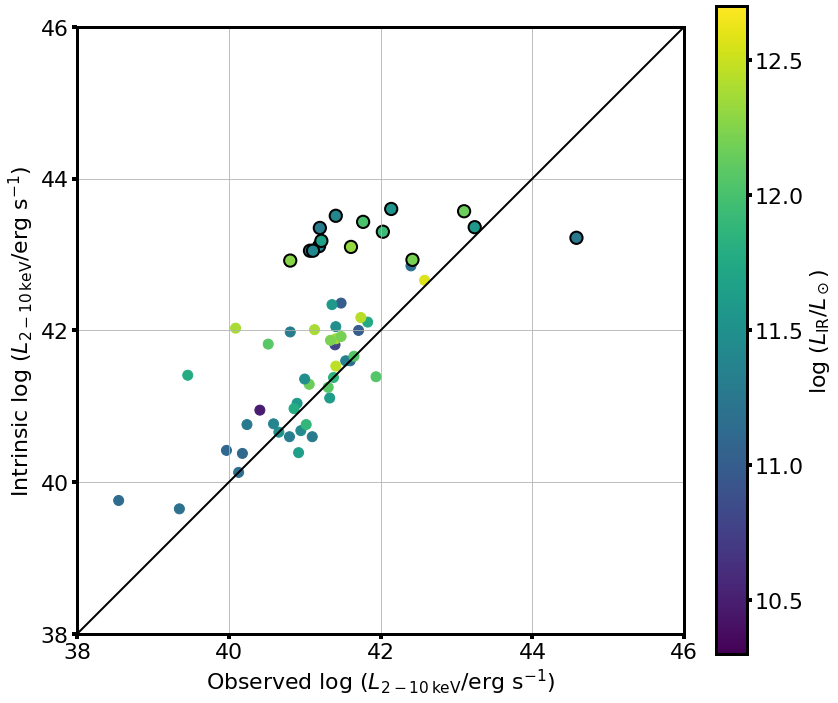

In [124]:
fig = plt.figure(figsize=(12,10))
gs = fig.add_gridspec(nrows=1,ncols=2,width_ratios=[3,0.15],wspace=0.1,top=0.95,bottom=0.05)
ax1 = fig.add_subplot(gs[0])
ax1.set_aspect('equal')
allpts = plt.scatter(L2_10_obs_match,L2_10_int_match,c=LIR2_match,s=100)
# axcb = fig.colorbar(allpts, orientation='vertical', pad=0.1)
# axcb.mappable.set_clim(10.3, 12.7)
# axcb.set_label(r'log $(L_{\rm IR}$/$L_\odot$)')
samp = plt.scatter(L2_10_obs_match[L2_10_int_match >= 42.9],L2_10_int_match[L2_10_int_match >= 42.9],c=LIR2_match[L2_10_int_match > 42.9],s=150,edgecolor='k',linewidth=2)
axcb1 = fig.colorbar(samp, orientation='vertical', pad=-1)
axcb1.mappable.set_clim(10.3, 12.7)
axcb1.remove()
plt.plot(np.arange(38,50),np.arange(38,50),color='k',lw=2)
plt.xlabel(r'Observed log $(L_{2-10\,\rm keV}$/erg s$^{-1}$)')
plt.ylabel(r'Intrinsic log $(L_{2-10\,\rm keV}$/erg s$^{-1}$)')
plt.xlim(38,46)
plt.ylim(38,46)
ax1.set_xticks([38,40,42,44,46])
ax1.set_yticks([38,40,42,44,46])
axcb = fig.add_subplot(gs[:,-1:])
cb = fig.colorbar(allpts, cax=axcb, orientation='vertical')
cb.mappable.set_clim(10.3, 12.7)
cb.set_label(r'log $(L_{\rm IR}$/$L_\odot$)')
# plt.colorbar(label=r'log $(L_{\rm IR}$/$L_\odot$)')
ax1.grid()
plt.savefig('/Users/connor_auge/Research/Disertation/GOALS/GOALS_figs/_paper/Lx_scatter.pdf')
plt.show()

In [99]:
print(min(LIR2_match))

10.49
